<a href="https://colab.research.google.com/github/DionisiusNRN/apple-stock-prediction/blob/main/Apple_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving apple_stock.csv to apple_stock.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
df = pd.read_csv('apple_stock.csv')

# Tampilkan 5 baris pertama
df.head()

,Date,Open,High,Low,Close
0,2017-01-04 00:00:00-05:00,26.822499,26.975308,26.799347,26.861858
1,2017-01-05 00:00:00-05:00,26.838712,27.056348,26.813243,26.998466
2,2017-01-06 00:00:00-05:00,27.037822,27.357332,26.966049,27.299450
3,2017-01-09 00:00:00-05:00,27.308712,27.651374,27.306398,27.549501
4,2017-01-10 00:00:00-05:00,27.498560,27.639792,27.389743,27.577280


In [3]:
# Informasi umum
df.info()

# Cek nilai null
print("\nJumlah nilai null per kolom:\n", df.isnull().sum())

# Ubah kolom Date ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sortir berdasarkan tanggal (kalau belum urut)
df = df.sort_values('Date')

# Lihat deskripsi statistik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2000 non-null   object 
 1   Open    2000 non-null   float64
 2   High    2000 non-null   float64
 3   Low     2000 non-null   float64
 4   Close   2000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 78.3+ KB

Jumlah nilai null per kolom:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


/tmp/ipython-input-3-2859724640.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,Open,High,Low,Close
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,110.676105,111.866217,109.575298,110.781413
std,61.804725,62.417843,61.241069,61.869524
min,26.822499,26.975308,26.799347,26.861858
25%,45.813782,46.241246,45.496094,45.854988
50%,120.781859,122.044538,118.722501,120.394634
75%,163.591721,165.333218,162.236409,163.624237
max,247.960007,250.800003,246.259995,248.130005


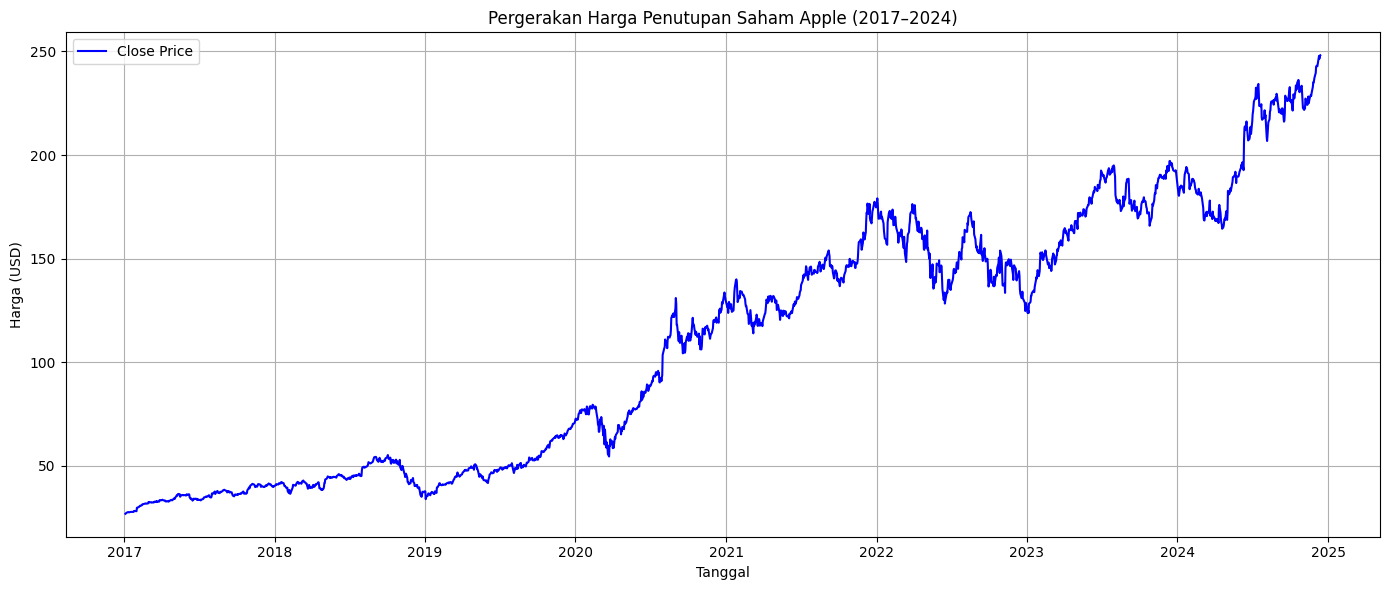

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Pergerakan Harga Penutupan Saham Apple (2017–2024)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
df[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999818,0.999814,0.999604
High,0.999818,1.000000,0.999758,0.999816
Low,0.999814,0.999758,1.000000,0.999816
Close,0.999604,0.999816,0.999816,1.000000


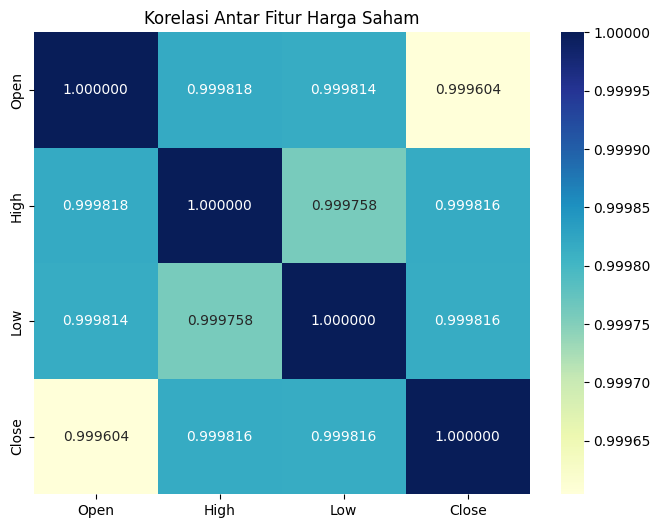

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['Open', 'High', 'Low', 'Close']].corr(),
    annot=True,
    cmap='YlGnBu',
    fmt='.6f',  # Tampilkan 2 angka di belakang koma
    annot_kws={"size": 10}  # Ukuran teks anotasi (opsional)
)
plt.title('Korelasi Antar Fitur Harga Saham')
plt.show()

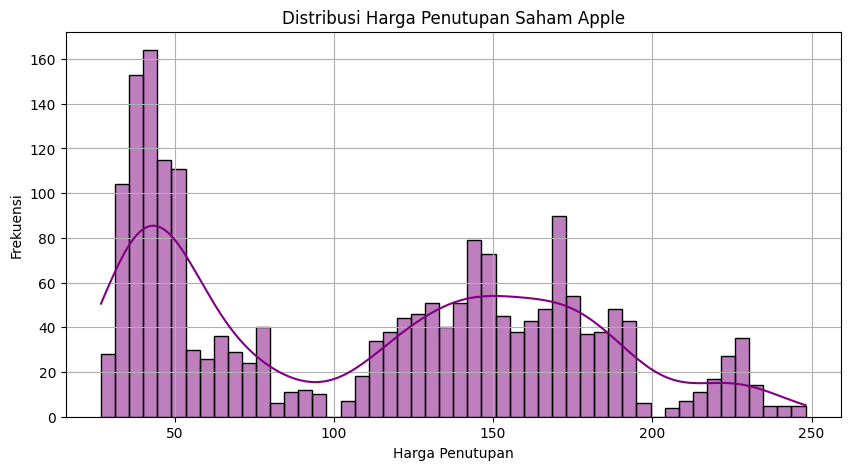

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='purple')
plt.title('Distribusi Harga Penutupan Saham Apple')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

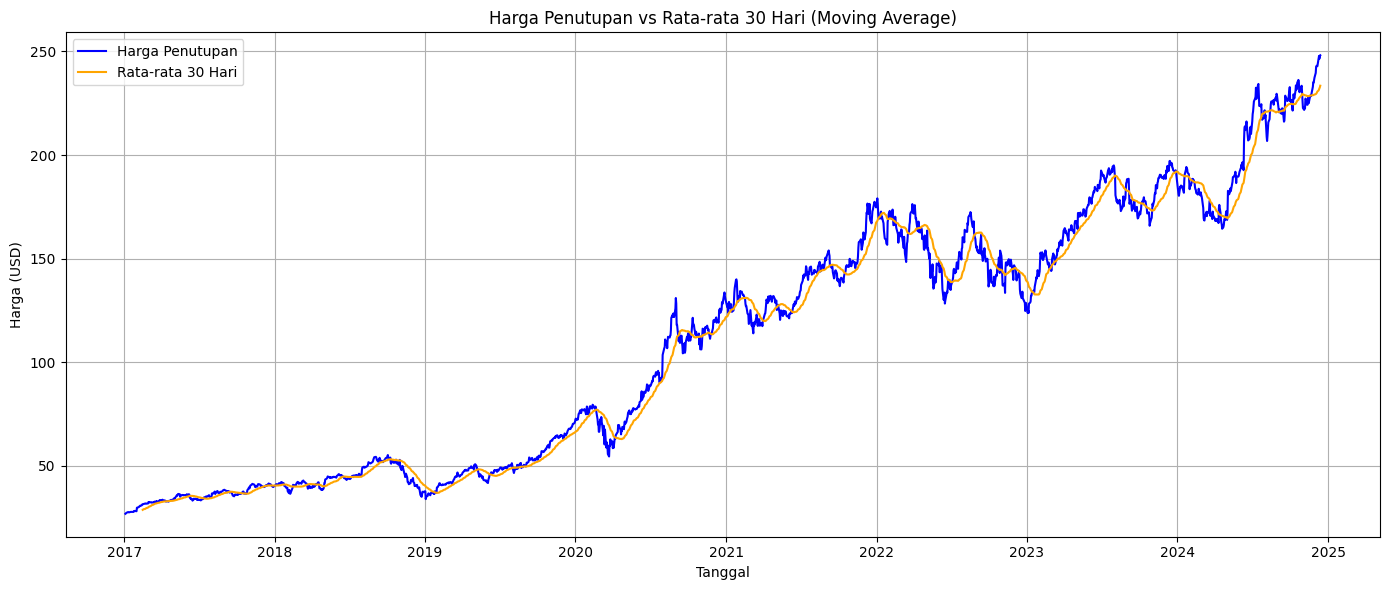

In [7]:
# Buat kolom moving average
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Visualisasi Close dan MA_30
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Harga Penutupan', color='blue')
plt.plot(df['Date'], df['MA_30'], label='Rata-rata 30 Hari', color='orange')
plt.title('Harga Penutupan vs Rata-rata 30 Hari (Moving Average)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

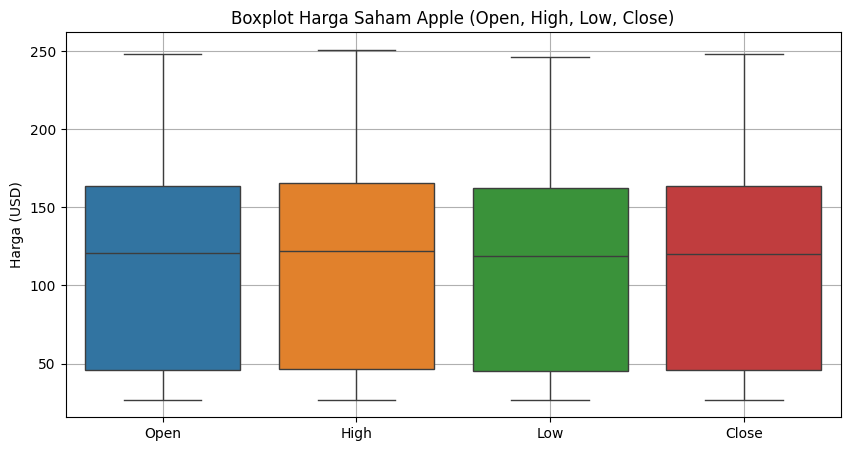

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot Harga Saham Apple (Open, High, Low, Close)')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.show()

In [9]:
# Tabel korelasi antar semua kolom numerik
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
correlation_matrix

,Open,High,Low,Close
Open,1.000000,0.999818,0.999814,0.999604
High,0.999818,1.000000,0.999758,0.999816
Low,0.999814,0.999758,1.000000,0.999816
Close,0.999604,0.999816,0.999816,1.000000


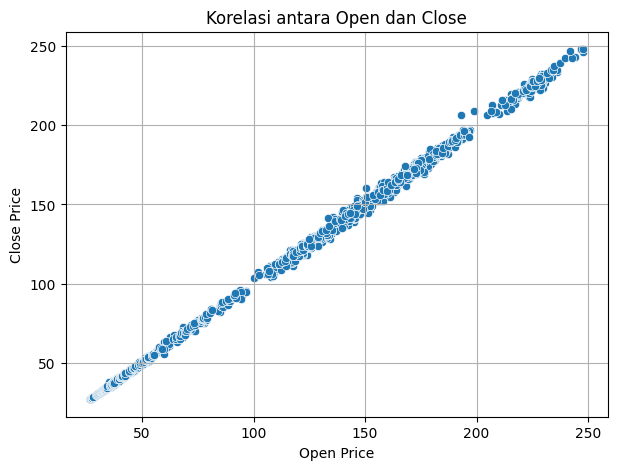

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Korelasi antara Open dan Close')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Pilih fitur yang ingin digunakan
X = df[['Open', 'High', 'Low']]
y = df['Close']

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)

# Gabungkan fitur dan koefisien dalam tabel
pd.DataFrame({'Fitur': X.columns, 'Koefisien': model.coef_})

Intercept: 0.005512774602351556
Koefisien: [-0.61178676  0.80163457  0.81043049]


,Fitur,Koefisien
0,Open,-0.611787
1,High,0.801635
2,Low,0.810430


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung metrik
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.4789114375641067
Mean Squared Error (MSE): 0.48388205530547507
R-squared (R²): 0.9998789067046681


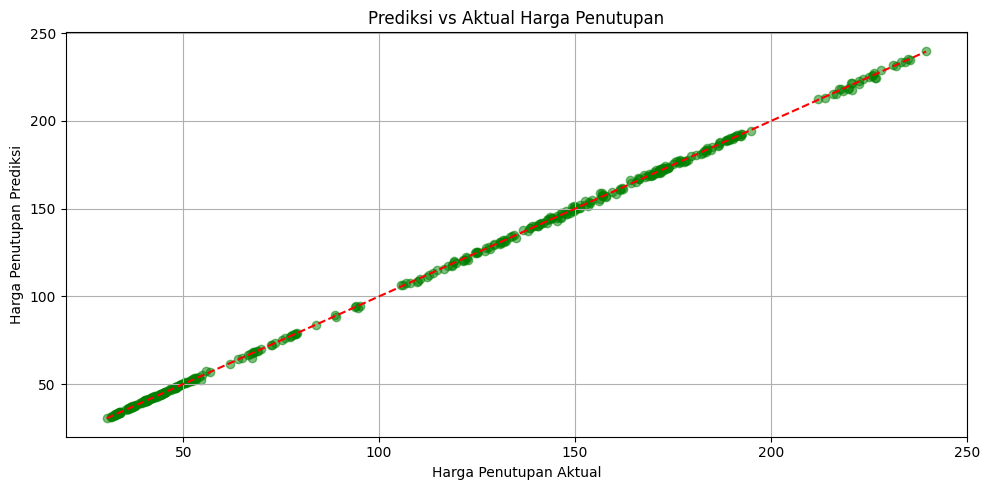

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Harga Penutupan Aktual')
plt.ylabel('Harga Penutupan Prediksi')
plt.title('Prediksi vs Aktual Harga Penutupan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
!pip install plotly

In [17]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Harga Penutupan'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA_30'], mode='lines', name='Rata-rata 30 Hari'))

fig.update_layout(title='Dashboard Interaktif: Harga Penutupan Saham Apple',
                  xaxis_title='Tanggal',
                  yaxis_title='Harga (USD)',
                  template='plotly_white')

fig.show()

In [18]:
import plotly.express as px

fig = px.scatter_matrix(df,
                        dimensions=['Open', 'High', 'Low', 'Close'],
                        title='Matrix Korelasi Interaktif Harga Saham',
                        height=600)

fig.show()

In [19]:
import plotly.graph_objects as go

# Buat prediksi untuk seluruh dataset (bukan cuma data uji)
X_all = df[['Open', 'High', 'Low']]
df['Predicted_Close'] = model.predict(X_all)

# Plot interaktif
fig = go.Figure()

# Harga penutupan aktual
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'],
                         mode='lines', name='Harga Penutupan Asli'))

# Moving average 30 hari
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA_30'],
                         mode='lines', name='Rata-rata 30 Hari'))

# Harga penutupan hasil prediksi model
fig.add_trace(go.Scatter(x=df['Date'], y=df['Predicted_Close'],
                         mode='lines+markers',
                         name='Prediksi Harga Penutupan',
                         marker=dict(size=4),
                         hovertemplate='Tanggal: %{x}<br>Prediksi Close: %{y:.2f} USD'))

# Layout
fig.update_layout(title='Dashboard Interaktif: Harga Penutupan vs Prediksi Harga',
                  xaxis_title='Tanggal',
                  yaxis_title='Harga (USD)',
                  template='plotly_white',
                  legend=dict(x=0.01, y=0.99))

fig.show()